## Plot a 2d ODE and find its limit cycle

In [67]:
# Import All Subsystems
include("../examples/example_functions.jl")
include("../src/FiniteDifference.jl")
include("../src/NumericalContinuation.jl")
include("../src/NumericalShooting.jl")
include("../src/ODESolver.jl")
include("../src/Visualisation.jl")
using PlotlyJS
using NLsolve

We will conduct analysis on the predator prey system, a version of the Lokta-Volterra equations.

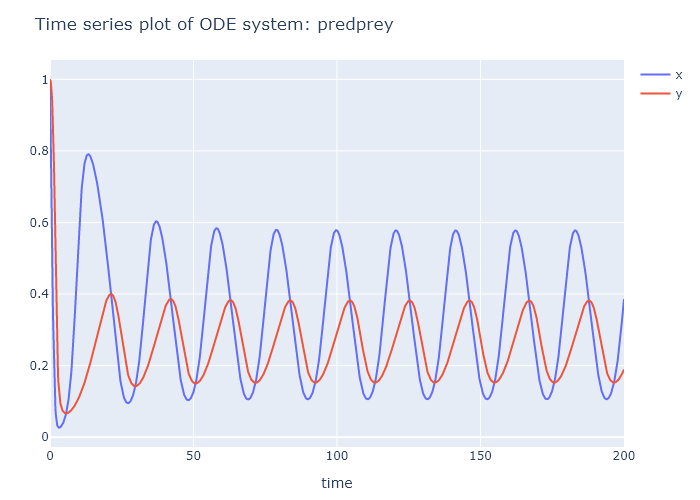

In [73]:
t = 0:0.1:200
u0 = [1 1]

plot_ode(predprey, u0, t, labels=["x" "y"])

We can isolate a periodic orbit by varying b between 0.1 and 0.5, passing the "b" parameter is as simple as passing it to the plot_ode function, shown below.

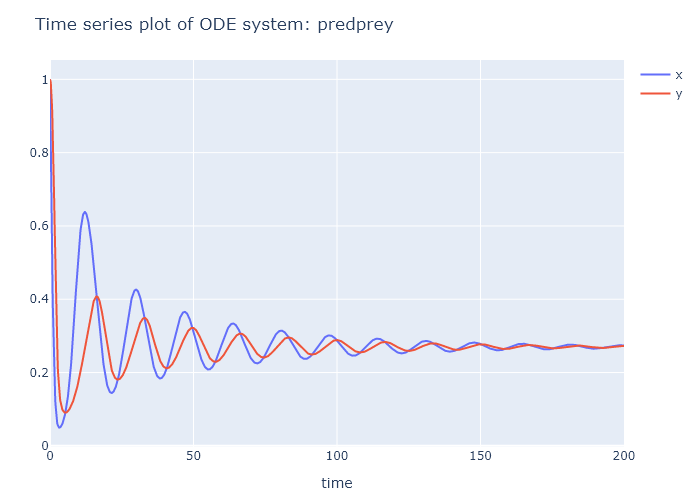

In [74]:
t = 0:0.1:200
u0 = [1 1]

plot_ode(predprey, u0, t, labels=["x" "y"], b=0.3)

Find its initial conditions by trying values that result in very periodic graphs. [.5 .25], for example.

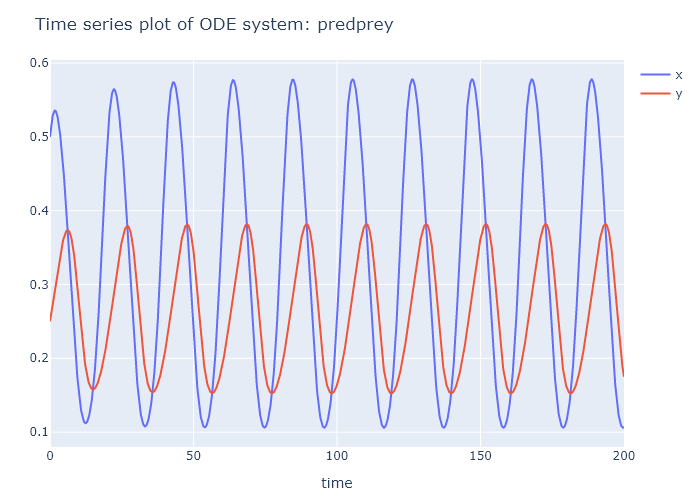

In [78]:
t = 0:0.1:200
u0 = [0.5 0.25]

plot_ode(predprey, u0, t, labels=["x" "y"], b=0.2)

In this way, the period can be measured using Plotly's zoom features, and clicking at the peaks, roughly 20s in this case. Later, the numerical shooting method will allow the period to be found numerically. We can also plot the phase portrait of this system using the built-in `plot_phase_portrait` function.

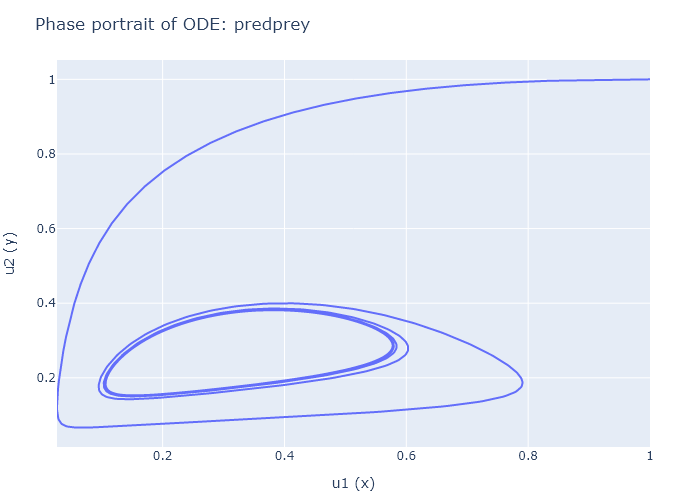

In [9]:
t = 0:0.1:600
plot_phase_portrait(predprey, [1 1], t, labels = ["u1 (x)" "u2 (y)"])

Notice that as time progresses, the phase portrait of the ODE converges to this periodic orbit, regardless of the initial conditions. We can use a technique called Numerical shooting to find this orbit and start our series there. 

## Shooting Technique to find limit cycles

The `find_limit_cycle` function does just this for us. Here's an example:

In [10]:
u0, T = find_limit_cycle(predprey, [1 1], 20.0, phase_index=0)
println("u0: ", u0)
println("Period: ", T)

u0: [0.5778714844291404 0.2861488834698955]
Period: 20.816866584064794


The initial conditions found previously are here again, albeit to slightly higher accuracy. We can alter the phase index to find another set of initial conditions that result in a limit cycle for the prey-predator system.

In [11]:
u0_1, T_1 = find_limit_cycle(predprey, [1 1], 20.0, phase_index=1)
println("u0 (1): ", u0_1)
println("Period (1): ", T_1)

u0 (1): [0.3818133658672705 0.3818133658672686]
Period (1): 20.816866584347


We can plot the phase portrait of the function using the first u0 as our initial condition:

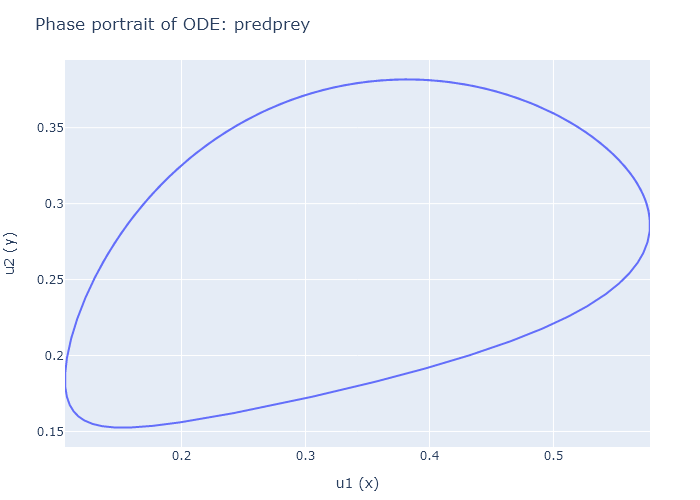

In [12]:
plot_phase_portrait(predprey, u0, 0:0.01:30, labels = ["u1 (x)" "u2 (y)"])

Notice how as long as the time is greater than the period, you'll always see the same shape. This is because the ODE is stuck in a periodic solution, and can't get out! We can plot the other limit clycle initial condition as well, to see if it matches:

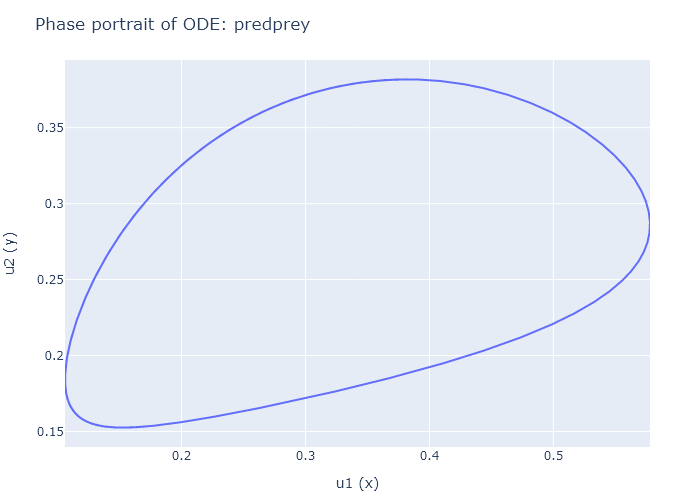

In [14]:
plot_phase_portrait(predprey, u0_1, 0:0.01:30, labels = ["u1 (x)" "u2 (y)"])